### This dataset contains diagnostic features for breast cancer classification. It is widely used in machine learning tasks to predict whether a tumor is Malignant (M) or Benign (B) based on cell nuclei characteristics

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier

In [15]:
df = pd.read_csv("./Breast_cancer_dataset.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [16]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [17]:
# Removes id and Unnamed: 32 columns because they do not provide useful information for classification.
# errors="ignore" prevents errors if a column does not exist.
df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")

In [18]:
# Encode diagnosis
# The target column diagnosis contains:
# "M" = Malignant
# "B" = Benign
# Machine learning models require numerical labels, so we convert:
# "M" → 1
# "B" → 0
# This creates a binary classification target.
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

In [23]:
# Split features/target
# X = all input features (e.g., radius_mean, texture_mean, etc.)
# y = the target label (0 or 1)
# This separates what you want to predict from what you use to predict it.
X = df.drop("diagnosis", axis=1).head()
y = df["diagnosis"]
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


In [ ]:
# Train/test split
# This splits the dataset into:
# 80% training data
# 20% testing data
# random_state=42 makes the split reproducible (same every time).
# Purpose:
# Train the model on known data (training set)
# Test the model on unseen data (testing set)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale numeric features for non-tree models
# Why scale?
# Some algorithms (Logistic Regression, SVM, etc.) perform better when features are normalized.
# StandardScaler transforms all features to:
# mean = 0
# standard deviation = 1
# Key points:
# fit_transform() is applied on training data ONLY
# transform() is applied on test data using the same parameters
# This avoids data leakage.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 1. It creates a dictionary of machine learning models
# probability=True allows SVM to output probabilities (needed for ROC curve).
# max_iter=5000 ensures Logistic Regression fully converges.
# eval_metric="logloss" prevents XGBoost warnings.


models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(eval_metric="logloss")
}
# 2. It initializes an empty dictionary for results
results = {}

In [ ]:
# What the Code Does (Simple Explanation)
# This block:
# ✔️ Trains every model
# ✔️ Makes predictions
# ✔️ Calculates accuracy, confusion matrix, and classification report
# ✔️ Computes ROC curve and AUC
# ✔️ Stores all results in a dictionary
# ✔️ Prints progress for the user

# --------------------------------------------------------------
# 4. TRAIN MODELS & EVALUATE
# --------------------------------------------------------------
for name, model in models.items():

    print("\n==============================")
    print(f"Training Model: {name}")
    print("==============================")

    # Use scaled data for non-tree models
    # 🔹 Why?
    # Some ML models require feature scaling (Logistic Regression, SVM).
    # Tree models do not need scaling.
    # So:
    # Logistic Regression → uses scaled data
    # SVM → uses scaled data
    # Random Forest → raw data
    # Gradient Boosting → raw data
    # XGBoost → raw data
    # What happens here:
    # model.fit() trains the model
    # model.predict() generates class predictions
    # model.predict_proba()[:,1] gives the probability of class 1 (malignant) → needed for ROC curves.
    if name in ["Logistic Regression", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

    # Metrics
    # Compute performance metrics
    acc = accuracy_score(y_test, y_pred)
    # Classification Report (Precision, Recall, F1-score)
    report = classification_report(y_test, y_pred)
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    #This shows metrics for each model in the terminal.
    print(f"\nAccuracy: {acc:.4f}")
    print("\nClassification Report:")
    print(report)

    # ROC curve
    # Compute ROC curve + AUC
    # These values are required to draw the ROC curve later.
    # FPR = false positive rate
    # TPR = true positive rate
    # AUC = area under ROC curve (overall model performance)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Save results
    results[name] = {
        "model": model,
        "accuracy": acc,
        "report": report,
        "confusion_matrix": cm,
        "roc": (fpr, tpr, roc_auc),
    }


Training Model: Logistic Regression

Accuracy: 0.9737

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Training Model: Random Forest

Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Training Model: Gradient Boosting

Accuracy: 0.9561

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
        

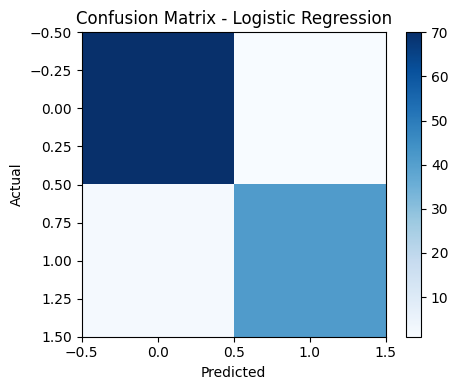

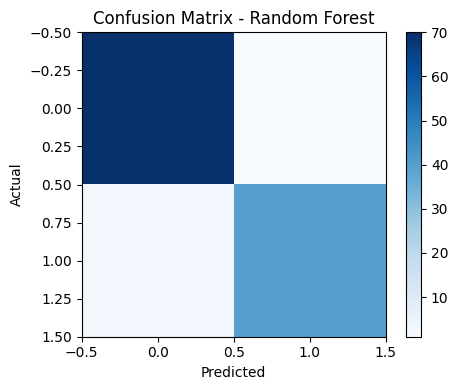

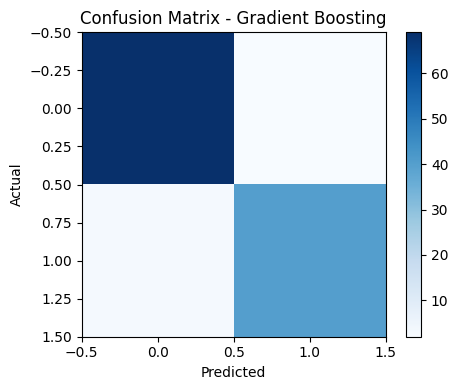

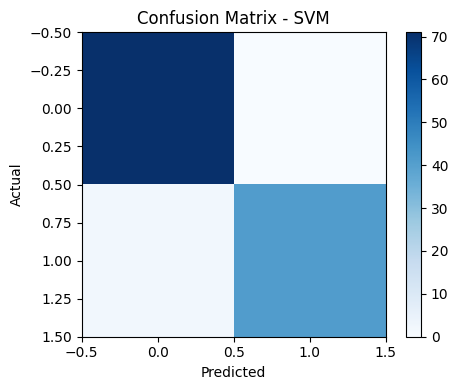

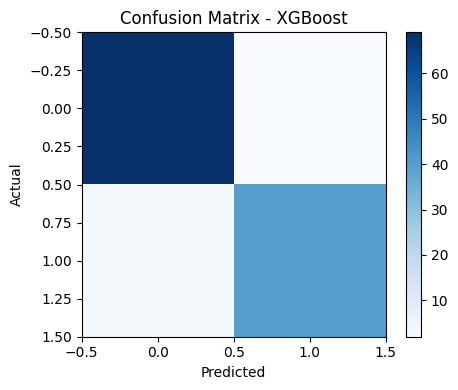

In [49]:
# --------------------------------------------------------------
# 5. PLOTS: CONFUSION MATRICES
# --------------------------------------------------------------
for name, data in results.items():
    # Create a new plot
    # Makes a new figure for each confusion matrix.
    # Size is set to 5×4 inches.
    plt.figure(figsize=(5, 4))
    # Display the confusion matrix as an image
    plt.imshow(data["confusion_matrix"], cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    # Add a color bar: Shows the scale of colors → helps interpret counts.
    plt.colorbar()
    # Adjust layout: Prevents labels and title from overlapping.
    plt.tight_layout()
    plt.show()


## First: What is a ROC Curve?
### A ROC curve (Receiver Operating Characteristic) shows how well a model separates the two classes (malignant vs benign).
### It plots:
#### TPR (True Positive Rate) → ability to detect cancer
#### FPR (False Positive Rate) → mistakes where benign was predicted as cancer
#### A good model has a curve close to the top left corner.
#### The AUC score (Area Under Curve) summarizes this curve from 0 to 1.
#### Higher AUC = better model.

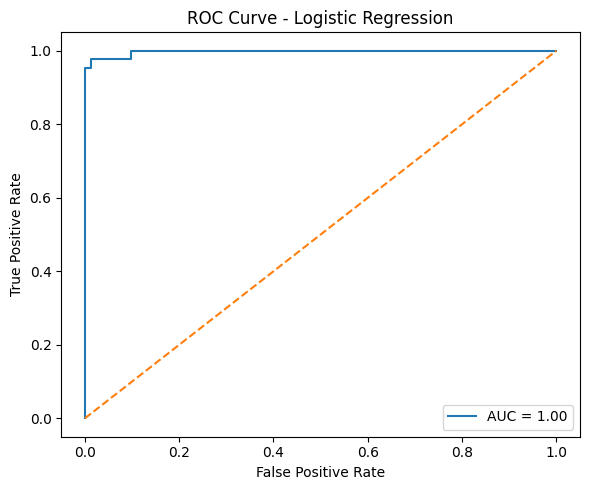

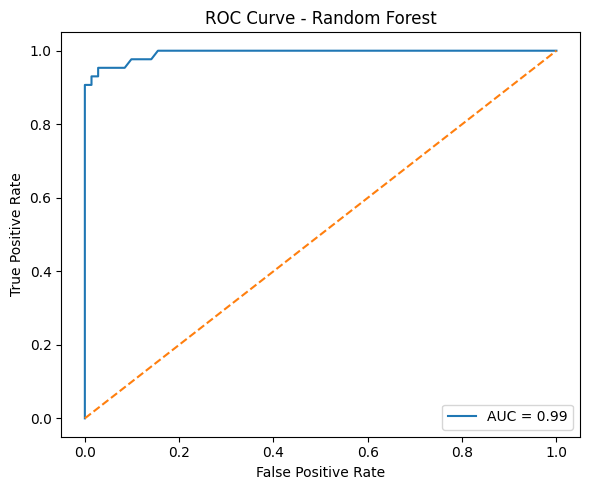

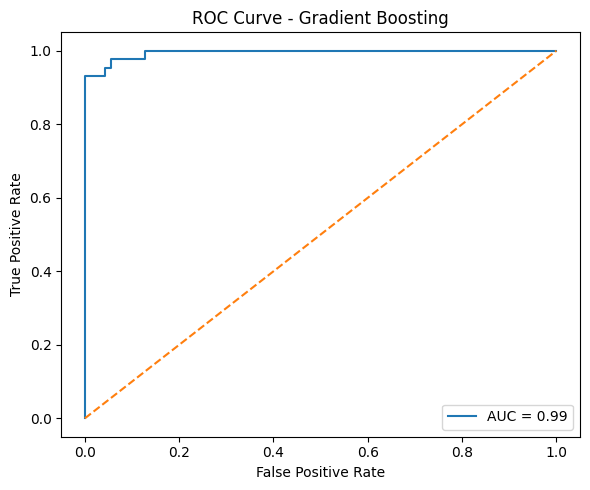

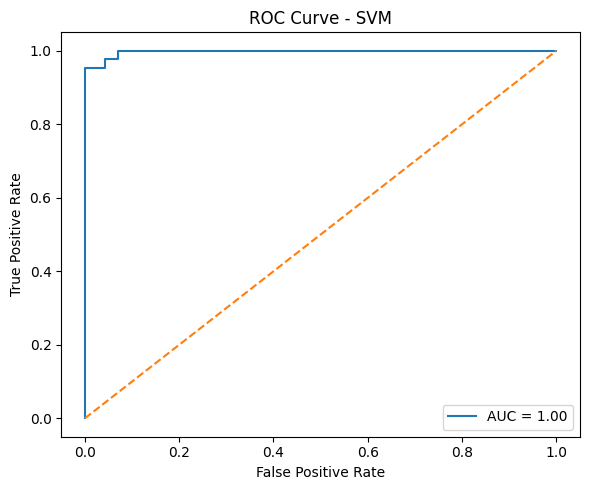

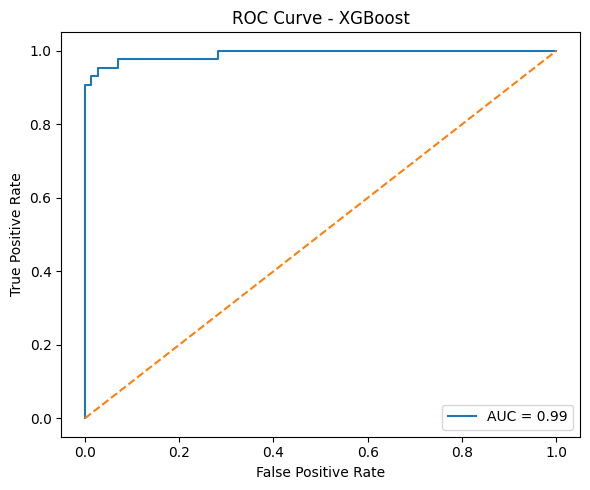

In [ ]:
# --------------------------------------------------------------
# 6. PLOTS: ROC CURVES
# --------------------------------------------------------------
# Each iteration handles:
# Logistic Regression
# Random Forest
# Gradient Boosting
# SVM
# XGBoost
for name, data in results.items():
    # Retrieve ROC values
    # This retrieves:
    # fpr → false positive rate array
    # tpr → true positive rate array
    # roc_auc → AUC score (0–1)
    # These values are needed to draw the curve.
    fpr, tpr, roc_auc = data["roc"]
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    # Add a diagonal "baseline" line
    # This dotted line represents a model that guesses randomly.
    # If your ROC curve is above this line → model is good
    # If your ROC curve is close to this line → model is poor
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.title(f"ROC Curve - {name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    # This shows the AUC score on the plot.
    plt.legend()
    plt.tight_layout()
    plt.show()


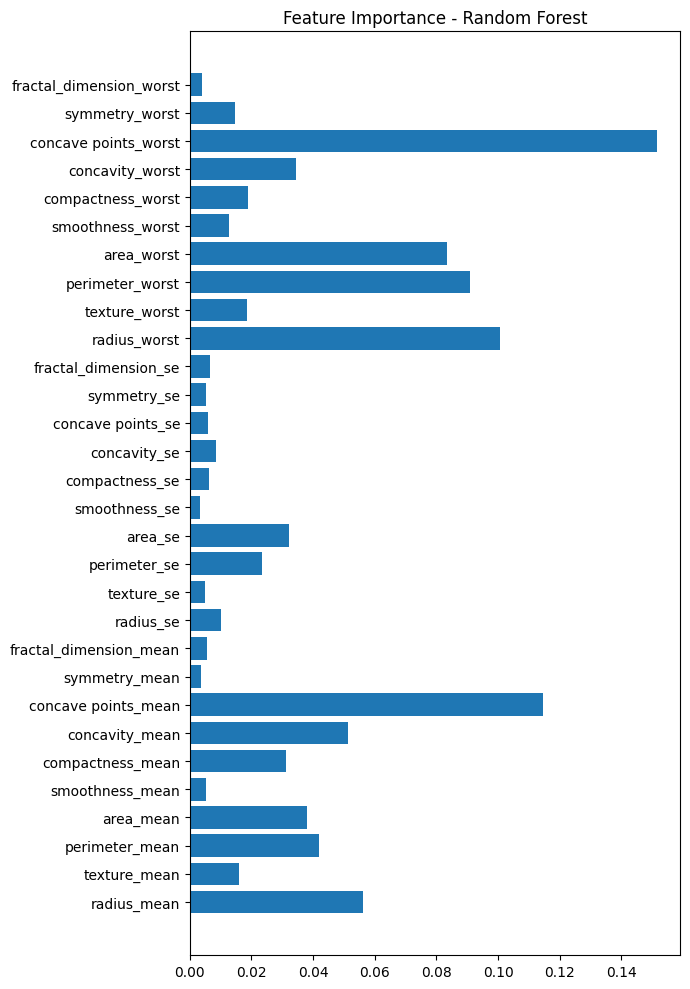

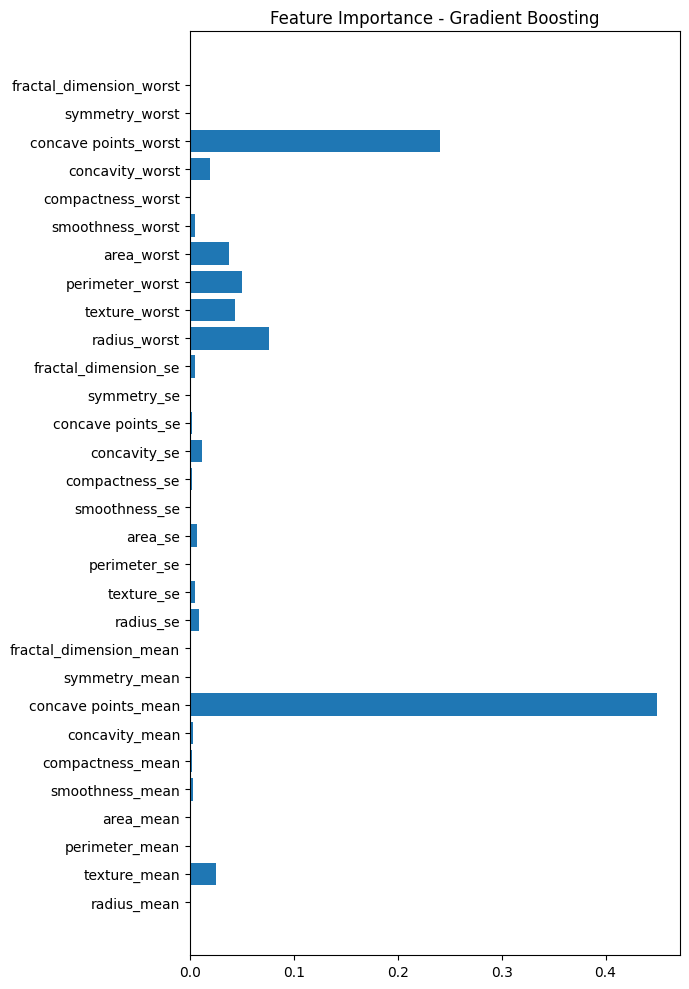

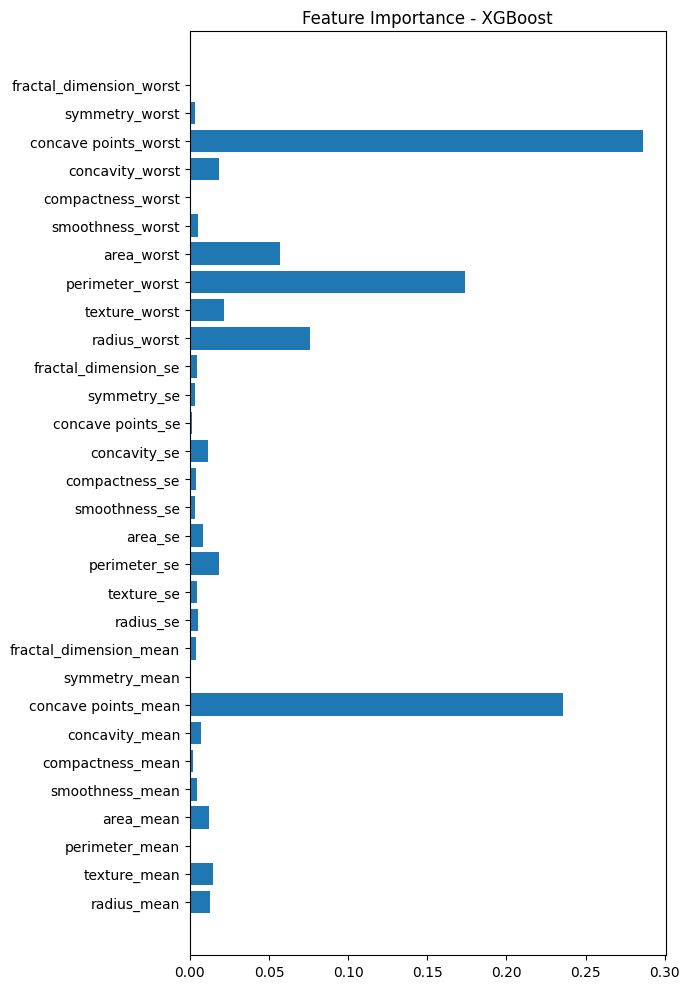

In [51]:
# --------------------------------------------------------------
# 7. FEATURE IMPORTANCE (Tree Models Only)
# --------------------------------------------------------------
tree_models = ["Random Forest", "Gradient Boosting", "XGBoost"]

for name in tree_models:
    model = results[name]["model"]
    importances = model.feature_importances_

    plt.figure(figsize=(7, 10))
    plt.barh(X.columns, importances)
    plt.title(f"Feature Importance - {name}")
    plt.tight_layout()
    plt.show()

In [52]:
# --------------------------------------------------------------
# 8. SAVE TRAINED MODELS AS .PKL FILES
# --------------------------------------------------------------
# for name, data in results.items():
#     filename = f"/mnt/data/{name.replace(' ', '_')}.pkl"
#     with open(filename, "wb") as f:
#         pickle.dump(data["model"], f)
#     print(f"Saved: {filename}")

# print("\nAll tasks completed successfully! 🎉")